# Modelo de Object Detection

## Configurações e importação do modelo


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install roboflow inference supervision

In [ ]:
import matplotlib.pyplot as plt
from roboflow import Roboflow
import pandas as pd
import cv2
import os


rf = Roboflow(api_key="P0Tl1nhUD7sHjcWmQCvs")
project = rf.workspace().project("bois-teste-samuel")
model = project.version(1).model

loading Roboflow workspace...
loading Roboflow project...


## Importação das imagens


In [ ]:
image_folder_path = '/content/drive/MyDrive/A_modeloDetecção/boi/test/images'

image_files = []
for filename in os.listdir(image_folder_path):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        image_files.append(os.path.join(image_folder_path, filename))

## Realizando predição em massa

In [ ]:
# Fazer predição em massa
predictions = []
for i in range(len(image_files)):
    prediction = model.predict(image_files[i], confidence=45, overlap=30).json()
    predictions.append(prediction)

# Imprimir as predições
print(predictions)

[{'predictions': [{'x': 136.5, 'y': 474.0, 'width': 193.0, 'height': 302.0, 'confidence': 0.7756781578063965, 'class': 'bulls', 'class_id': 0, 'detection_id': '46f9fc45-4061-4ed0-b8e4-baf52285bddc', 'image_path': '/content/drive/MyDrive/A_modeloDetecção/boi/test/images/06-08-24_video1_imagem_termica_edit_17662_1_png.rf.a3338a88f99e3670530bbede5031ccb2.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 510.5, 'y': 411.0, 'width': 99.0, 'height': 142.0, 'confidence': 0.7235373258590698, 'class': 'bulls', 'class_id': 0, 'detection_id': '51e1997d-1e23-49c7-a38c-2425bd3eaa27', 'image_path': '/content/drive/MyDrive/A_modeloDetecção/boi/test/images/06-08-24_video1_imagem_termica_edit_17662_1_png.rf.a3338a88f99e3670530bbede5031ccb2.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 391.0, 'y': 135.0, 'width': 134.0, 'height': 196.0, 'confidence': 0.5999904870986938, 'class': 'bulls', 'class_id': 0, 'detection_id': 'd0ac96f7-fafd-4f9e-bf4b-c7d8c8f8ce6b', 'image_path': '/content/dr

## Salvando resultados em um dataframe para mai facil visualização

In [ ]:
def save_predictions_to_df(predictions_list):
    # Lista para armazenar todas as previsões
    all_predictions = []

    # Iterar por cada conjunto de previsões
    for prediction_set in predictions_list:
        # Extrair as previsões de cada imagem
        for prediction in prediction_set['predictions']:
            # Adicionar ao conjunto de todas as previsões
            all_predictions.append(prediction)

    # Criar o DataFrame a partir das previsões consolidadas
    df = pd.DataFrame(all_predictions)

    return df

In [ ]:
save_predictions_to_df(predictions)

x      y  width  height  confidence  class  class_id  \
0   136.5  474.0  193.0   302.0    0.775678  bulls         0   
1   510.5  411.0   99.0   142.0    0.723537  bulls         0   
2   391.0  135.0  134.0   196.0    0.599990  bulls         0   
3   274.5  207.5  161.0   213.0    0.517187  bulls         0   
4   362.5  112.5  115.0   183.0    0.725997  bulls         0   
..    ...    ...    ...     ...         ...    ...       ...   
69  253.0  228.5  166.0   227.0    0.908838  bulls         0   
70  498.0  368.5  146.0   215.0    0.844662  bulls         0   
71  266.5  280.0  155.0   208.0    0.817101  bulls         0   
72  564.0  220.5  110.0   217.0    0.744754  bulls         0   
73  349.5  280.5  159.0   209.0    0.815995  bulls         0   

                            detection_id  \
0   46f9fc45-4061-4ed0-b8e4-baf52285bddc   
1   51e1997d-1e23-49c7-a38c-2425bd3eaa27   
2   d0ac96f7-fafd-4f9e-bf4b-c7d8c8f8ce6b   
3   0db1cb25-3528-41e3-910b-b28a03dfc4a9   
4   817c79f0-8a76-450b-84c7-5efe53282965   
..                                   ...   
69  842a7e2c-fabc-4b43-b3e2-79c3801a9de8   
70  d3c2eb27-c47d-47f7-a9cb-f55b864e2cf3   
71  37d1007b-f809-412d-a0f4-e4821257de9f   
72  35d71ec5-7e28-4b29-b1e4-47ffb70b5c19   
73  35c44136-54ef-4c06-a9bb-dfd9cf3bc197   

                                           image_path       prediction_type  
0   /content/drive/MyDrive/A_modeloDetecção/boi/...  ObjectDetectionModel  
1   /content/drive/MyDrive/A_modeloDetecção/boi/...  ObjectDetectionModel  
2   /content/drive/MyDrive/A_modeloDetecção/boi/...  ObjectDetectionModel  
3   /content/drive/MyDrive/A_modeloDetecção/boi/...  ObjectDetectionModel  
4   /content/drive/MyDrive/A_modeloDetecção/boi/...  ObjectDetectionModel  
..                                                ...                   ...  
69  /content/drive/MyDrive/A_modeloDetecção/boi/...  ObjectDetectionModel  
70  /content/drive/MyDrive/A_modeloDetecção/boi/...  ObjectDetectionModel  
71  /content/drive/MyDrive/A_modeloDetecção/boi/...  ObjectDetectionModel  
72  /content/drive/MyDrive/A_modeloDetecção/boi/...  ObjectDetectionModel  
73  /content/drive/MyDrive/A_modeloDetecção/boi/...  ObjectDetectionModel  

[74 rows x 10 columns]

## Plotando resultados

In [ ]:
def draw_box(img, x, y, width, height, label, confidence, color=(0, 255, 0), text_color=(255, 255, 255), thickness=2, text_box_height_increase=10):
    # Calcular as coordenadas dos vértices da caixa
    x1 = int(x - width / 2)
    y1 = int(y - height / 2)
    x2 = int(x + width / 2)
    y2 = int(y + height / 2)

    # Desenhar o retângulo da caixa
    cv2.rectangle(img, (x1, y1), (x2, y2), color, thickness)

    # Texto com o rótulo e a confiança (convertido para porcentagem)
    label_text = f'{label}: {confidence * 100:.2f}%'

    # Medir o tamanho do texto para desenhar o fundo corretamente
    (text_width, text_height), baseline = cv2.getTextSize(label_text, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)

    # Aumentar a altura do fundo do texto
    total_text_height = text_height + baseline + text_box_height_increase

    # Desenhar o retângulo de fundo do texto com altura aumentada
    cv2.rectangle(img, (x1, y1 - total_text_height - 5), (x1 + text_width, y1), color, -1)

    # Colocar o texto sobre o fundo
    cv2.putText(img, label_text, (x1, y1 - baseline - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, text_color, 2)


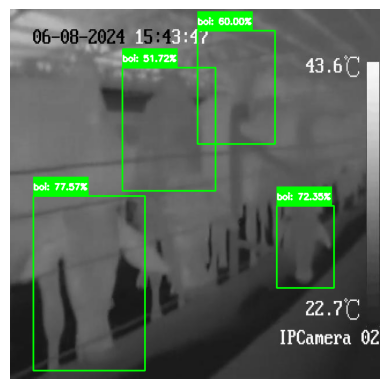

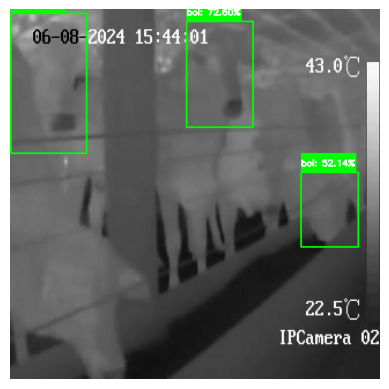

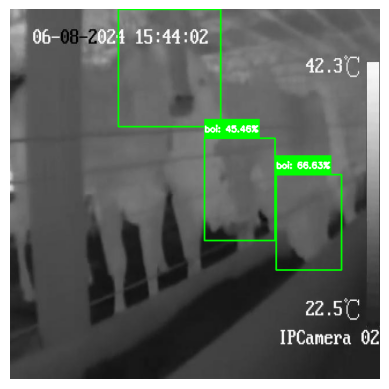

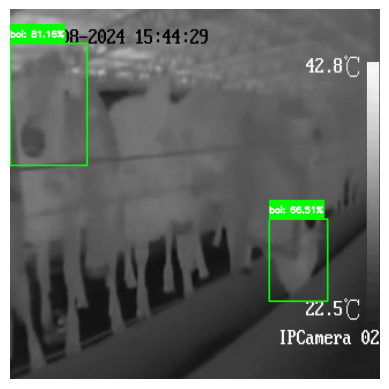

Nenhuma predição encontrada para a imagem 4


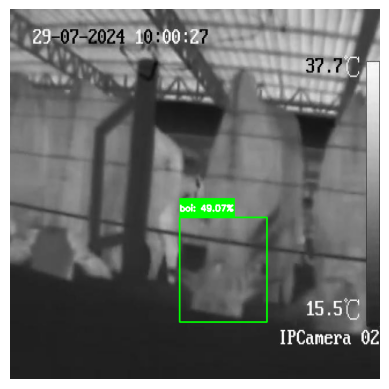

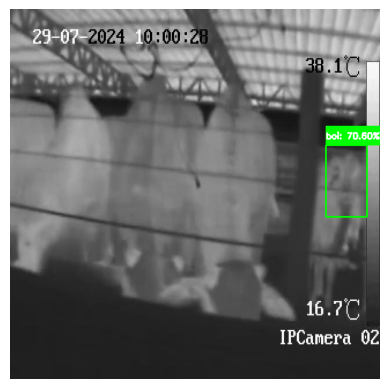

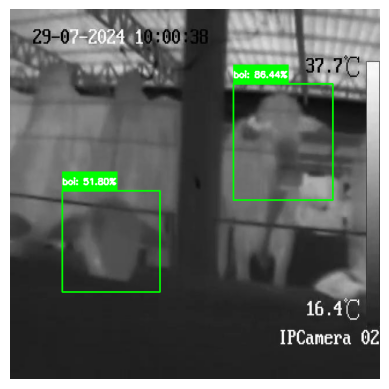

Nenhuma predição encontrada para a imagem 8
Nenhuma predição encontrada para a imagem 9
Nenhuma predição encontrada para a imagem 10


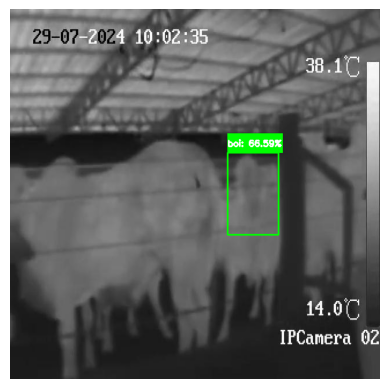

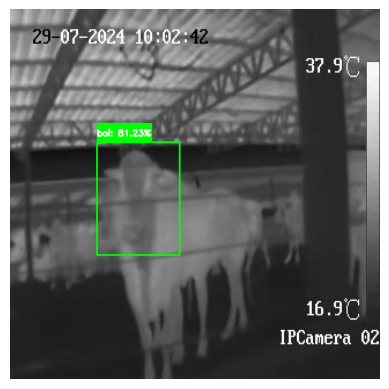

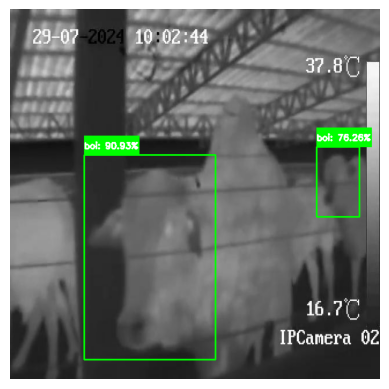

Nenhuma predição encontrada para a imagem 14


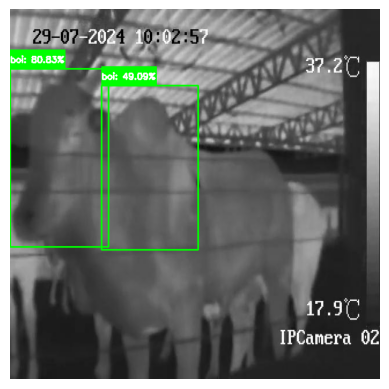

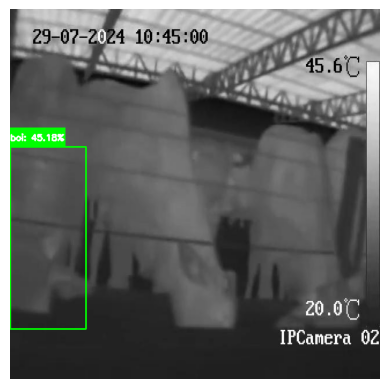

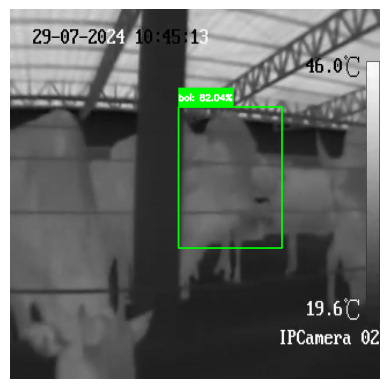

Nenhuma predição encontrada para a imagem 18


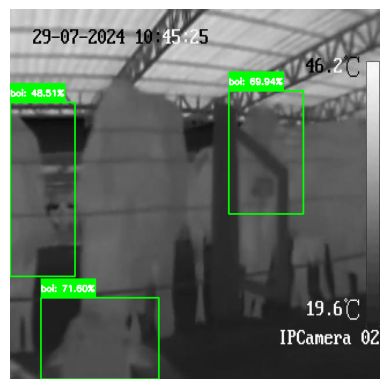

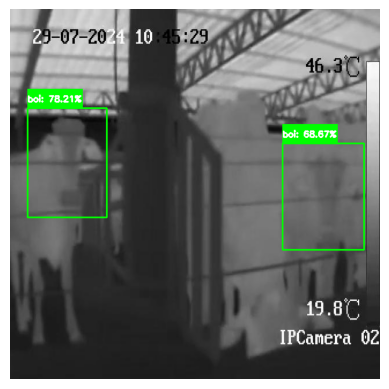

Nenhuma predição encontrada para a imagem 21
Nenhuma predição encontrada para a imagem 22


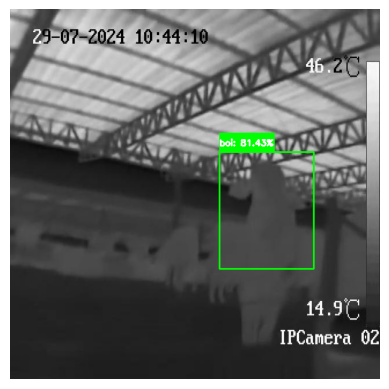

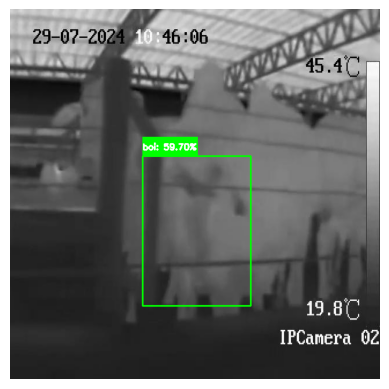

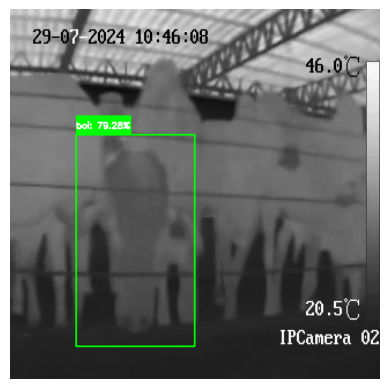

Nenhuma predição encontrada para a imagem 26
Nenhuma predição encontrada para a imagem 27
Nenhuma predição encontrada para a imagem 28


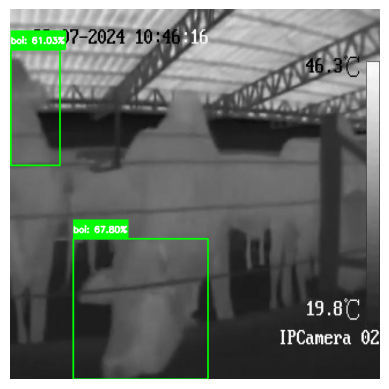

Nenhuma predição encontrada para a imagem 30
Nenhuma predição encontrada para a imagem 31
Nenhuma predição encontrada para a imagem 32


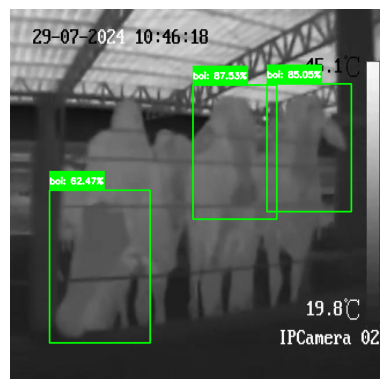

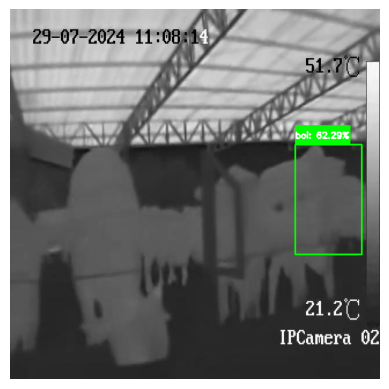

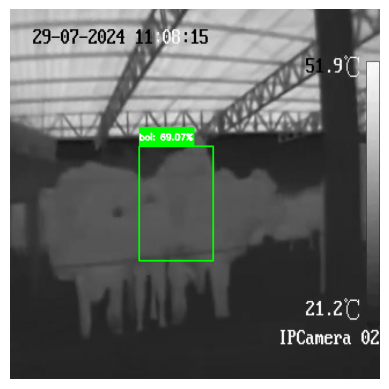

Nenhuma predição encontrada para a imagem 36
Nenhuma predição encontrada para a imagem 37
Nenhuma predição encontrada para a imagem 38
Nenhuma predição encontrada para a imagem 39
Nenhuma predição encontrada para a imagem 40


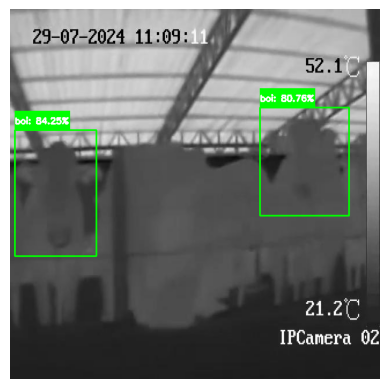

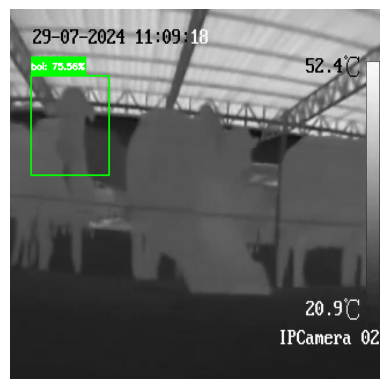

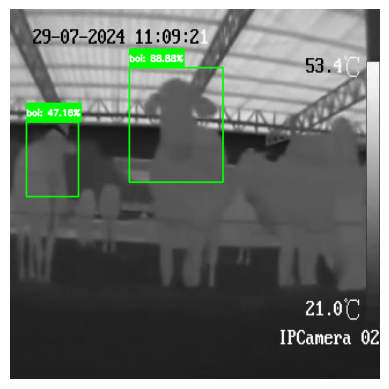

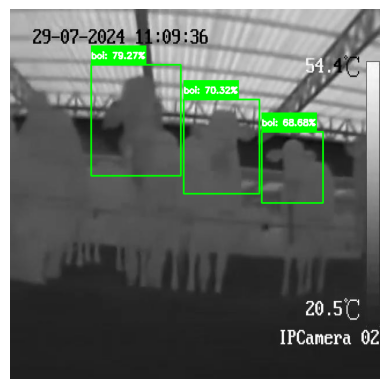

Nenhuma predição encontrada para a imagem 45
Nenhuma predição encontrada para a imagem 46


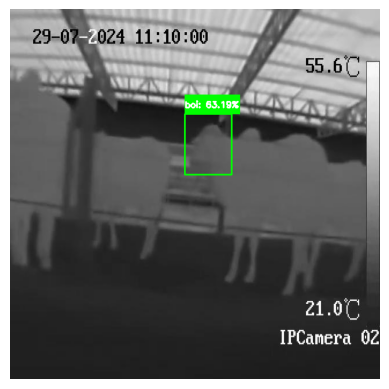

Nenhuma predição encontrada para a imagem 48


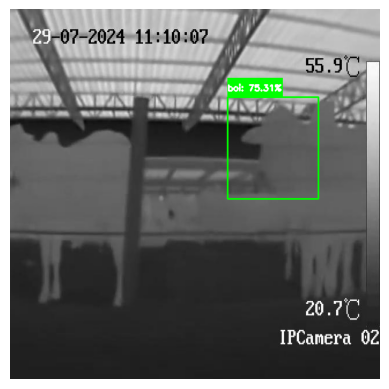

Nenhuma predição encontrada para a imagem 50
Nenhuma predição encontrada para a imagem 51


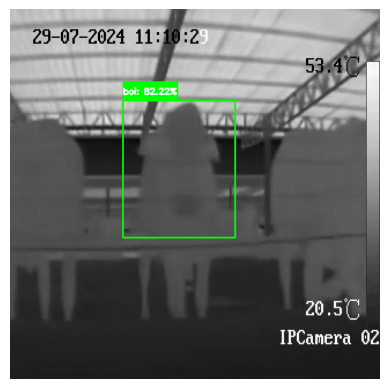

Nenhuma predição encontrada para a imagem 53
Nenhuma predição encontrada para a imagem 54
Nenhuma predição encontrada para a imagem 55


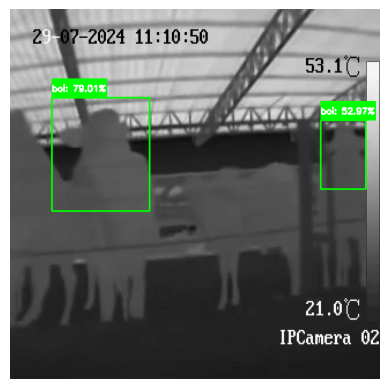

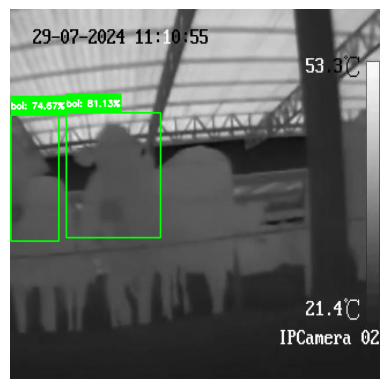

Nenhuma predição encontrada para a imagem 58
Nenhuma predição encontrada para a imagem 59
Nenhuma predição encontrada para a imagem 60
Nenhuma predição encontrada para a imagem 61
Nenhuma predição encontrada para a imagem 62


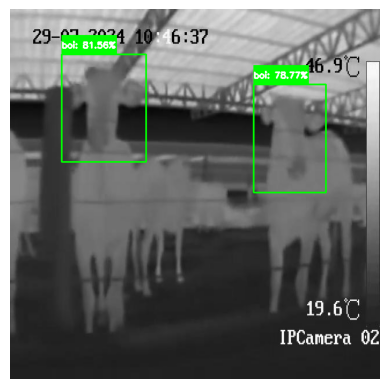

Nenhuma predição encontrada para a imagem 64
Nenhuma predição encontrada para a imagem 65
Nenhuma predição encontrada para a imagem 66


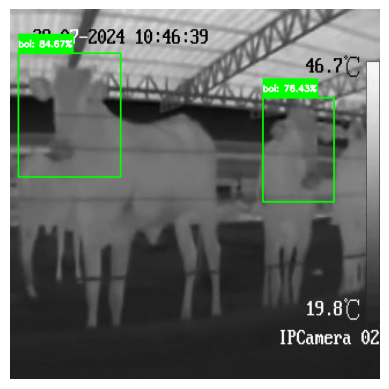

Nenhuma predição encontrada para a imagem 68
Nenhuma predição encontrada para a imagem 69


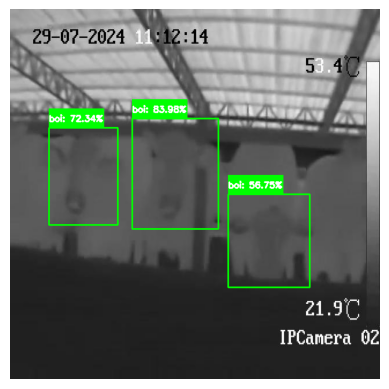

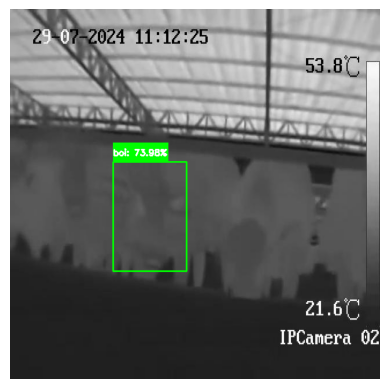

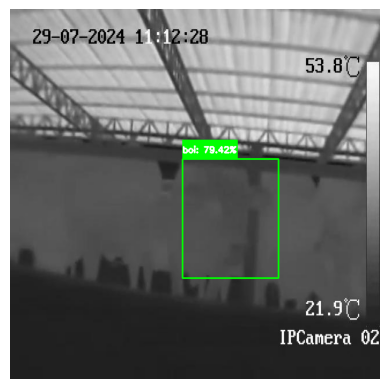

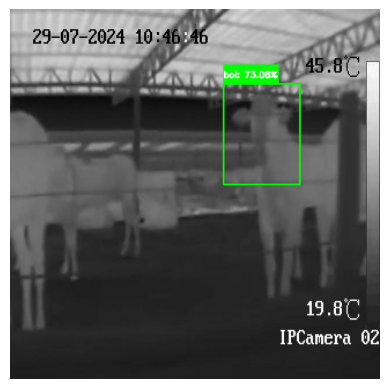

Nenhuma predição encontrada para a imagem 74


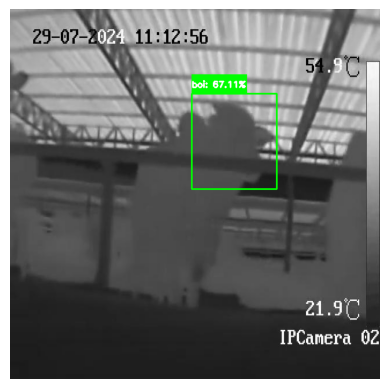

Nenhuma predição encontrada para a imagem 76


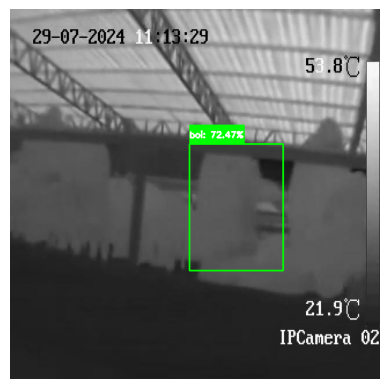

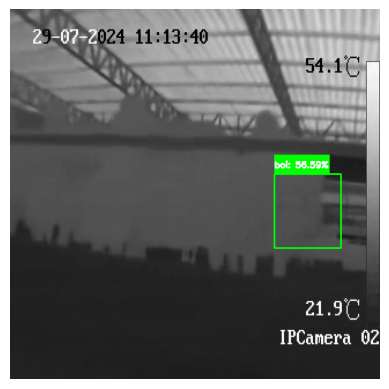

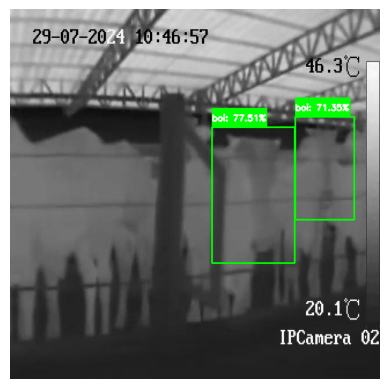

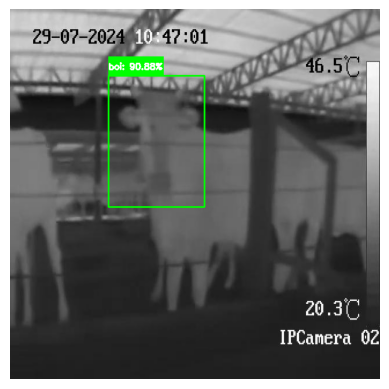

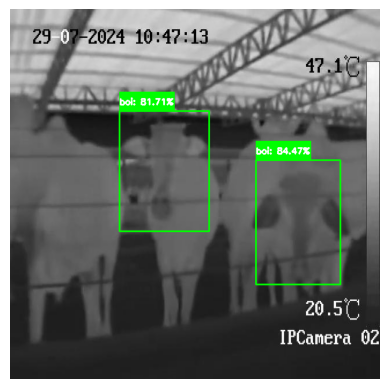

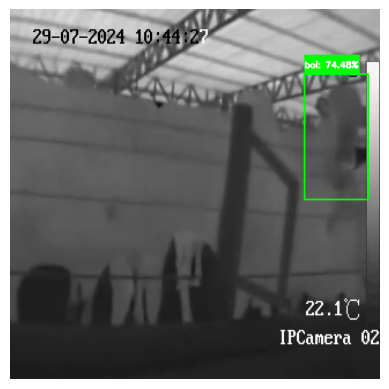

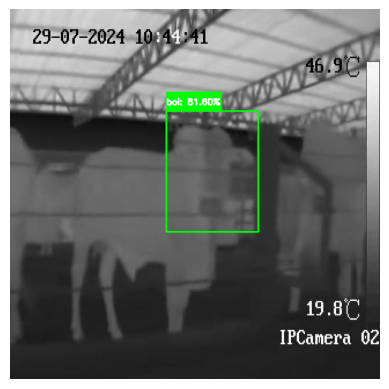

In [ ]:
for i in range(len(predictions)):
    # Verifica se 'predictions' existe no dicionário e se não está vazio
    if 'predictions' in predictions[i] and predictions[i]['predictions']:
        # Obtenha o caminho da imagem a partir da primeira predição
        image_path = predictions[i]['predictions'][0].get('image_path')

        # Verifica se o caminho da imagem não é nulo ou vazio
        if image_path:
            # Ler a imagem uma vez por loop
            img = cv2.imread(image_path)

            if img is not None:
                # Para cada predição da imagem, desenha a caixa
                for prediction in predictions[i].get('predictions', []):
                    x = prediction.get('x')
                    y = prediction.get('y')
                    width = prediction.get('width')
                    height = prediction.get('height')
                    label = prediction.get('class')
                    confidence = prediction.get('confidence')
                    draw_box(img, x, y, width, height, "boi", confidence)  # Desenhar a caixa na imagem

                # Exibe a imagem com todas as caixas desenhadas
                plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Converter BGR para RGB
                plt.axis('off')  # Remover os eixos
                plt.show()  # Mostrar a imagem com todas as caixas desenhadas
            else:
                print(f"Erro ao carregar a imagem no caminho: {image_path}")
        else:
            print("Caminho da imagem está vazio.")
    else:
        print(f"Nenhuma predição encontrada para a imagem {i}")